In [2]:
import pandas as pd

pathLyrics = "./song-lyrics/lyrics-data.csv"
pathArtists = "./song-lyrics/artists-data.csv"

dataframeLyrics = pd.read_csv(pathLyrics)
dataframeArtists = pd.read_csv(pathArtists)

#Only English + lowercase
#TODO: Chordsheets filtern
dataLyricsFilterd = dataframeLyrics[dataframeLyrics['Idiom'] == 'ENGLISH']
#dataLyricsFilterd = dataLyricsFilterd[dataLyricsFilterd['Lyric'] != 'Instrumental']
#dataLyricsFilterd = dataLyricsFilterd[dataLyricsFilterd['Lyric'] != 'Instrumental.']

dataLyricsFilterd = dataLyricsFilterd.apply(lambda x: x.astype(str).str.lower())
dataArtistsFilterd = dataframeArtists.apply(lambda x: x.astype(str).str.lower())
del dataArtistsFilterd['Genres']
del dataArtistsFilterd['Popularity']
del dataArtistsFilterd['Songs']

dataArtistsFilterd = dataArtistsFilterd[dataArtistsFilterd['Genre'] != 'samba']
dataArtistsFilterd = dataArtistsFilterd[dataArtistsFilterd['Genre'] != 'sertanejo']
dataArtistsFilterd = dataArtistsFilterd[dataArtistsFilterd['Genre'] != 'funk carioca']

#dataArtistsFilterd = dataArtistsFilterd[dataArtistsFilterd['Artist'] == '10000 maniacs']
#Hier ungewünschte Begriffe einfügen
patternDel = ["---", "instrumental","==="]
for patt in patternDel:
    filter = dataLyricsFilterd['Lyric'].str.contains(patt)
    dataLyricsFilterd = dataLyricsFilterd[~filter]

    
    
    
    
#dataArtistsFilterd
#dataLyricsFilterd.to_csv('filterdData.csv')

dataArtistsFilterd

,Artist,Link,Genre
0,10000 maniacs,/10000-maniacs/,rock
1,12 stones,/12-stones/,rock
2,311,/311/,rock
3,4 non blondes,/4-non-blondes/,rock
4,a cruz está vazia,/a-cruz-esta-vazia/,rock
...,...,...,...
3227,tati quebra barraco,/tati-quebra-barraco/,hip hop
3228,valesca popozuda,/valesca-popozuda/,pop
3229,vine rodry,/vine-rodry/,pop
3234,leandro sapucahy,/leandro-sapucahy/,pop


In [54]:
mergedData = pd.merge(dataLyricsFilterd, dataArtistsFilterd, how='inner', left_on='ALink',right_on='Link')
del mergedData['ALink']
del mergedData['SName']
del mergedData['SLink']
del mergedData['Idiom']
del mergedData['Artist']
del mergedData['Link']
mergedData
#mergedData.to_csv('mergedData.csv')

,Lyric,Genre
0,i could feel at the time. there was no way of ...,rock
1,i could feel at the time. there was no way of ...,pop
2,"take me now, baby, here as i am. hold me close...",rock
3,"take me now, baby, here as i am. hold me close...",pop
4,these are. these are days you'll remember. nev...,rock
...,...,...
122904,"her face is a map of the world, is a map of th...",rock
122905,i can't believe the news today. i can't close ...,rock
122906,i was so high i did not recognize. the fire bu...,rock
122907,well sometimes i go out by myself. and i look ...,rock


<AxesSubplot:>

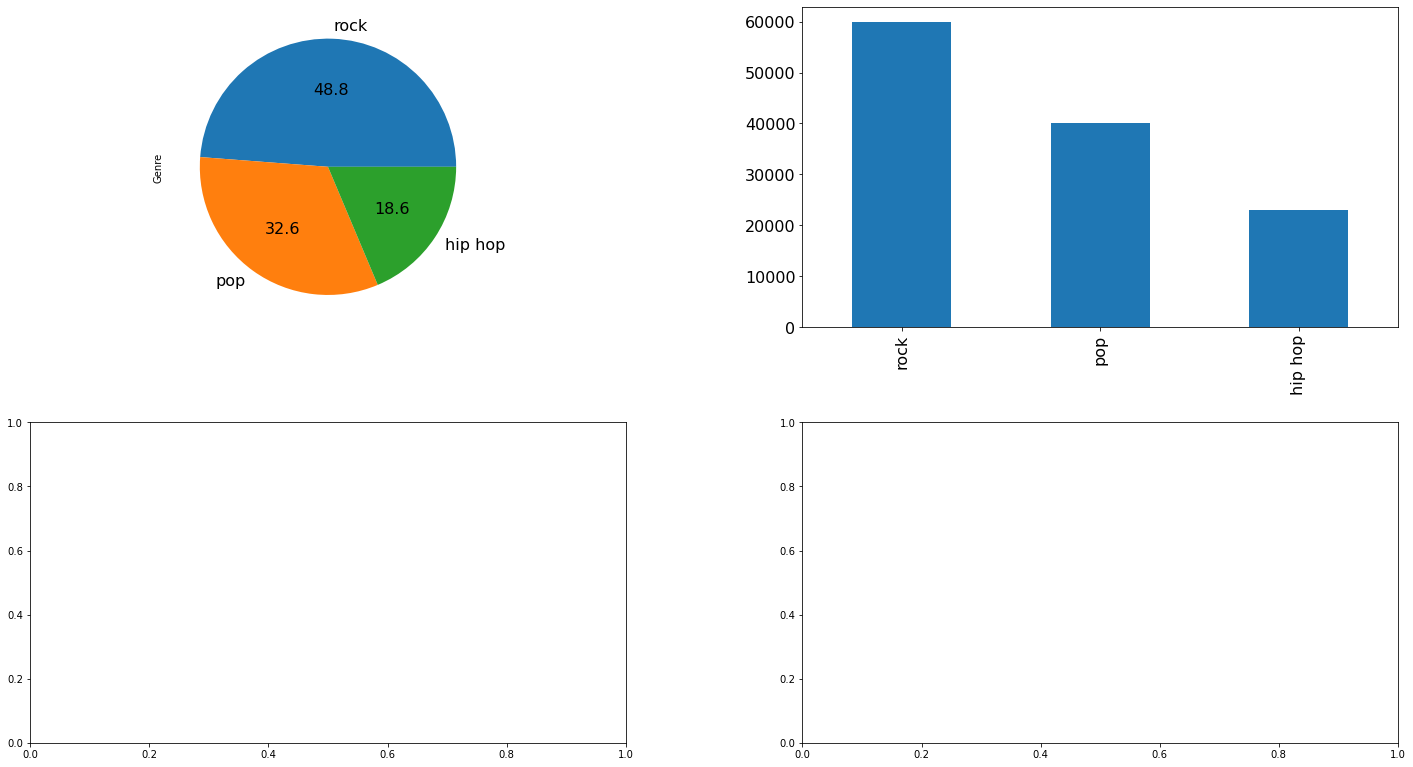

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt


genreCount = mergedData['Genre'].value_counts()

fig, axarr = plt.subplots(2, 2)
fig.tight_layout()


genreCount.plot.pie( figsize=(12, 12), fontsize=16, ax=axarr[0][0] , autopct='%.1f' )
genreCount.plot.bar( figsize=(22, 12), fontsize=16, ax=axarr[0][1] )



In [67]:
from collections import Counter 

replacement = {',','.','(',')','[chorus:]','-','/','?','!','[','&',']','"'}
string_temp = " ".join(mergedData["Lyric"])

for repl in replacement:
    string_temp = string_temp.replace(repl, ' ')
    #mergedData["Lyric"] = mergedData["Lyric"].replace(repl, ' ')

#word_index = Counter(" ".join(mergedData["Lyric"]).split()).most_common(1000)
word_index = Counter(string_temp.split()).most_common(1000)
word_index
#print(mergedData["Lyric"])

[('you', 1296473),
 ('i', 1280936),
 ('the', 1273241),
 ('to', 749714),
 ('and', 725472),
 ('a', 670131),
 ('me', 622702),
 ('it', 518243),
 ('my', 496745),
 ('in', 429973),
 ("i'm", 353518),
 ('that', 342083),
 ('on', 340569),
 ('your', 334889),
 ('of', 305651),
 ('all', 274136),
 ('we', 257226),
 ('be', 254703),
 ('is', 246474),
 ("don't", 239277),
 ('like', 239197),
 ('for', 237752),
 ('know', 232227),
 ('so', 230245),
 ('up', 214912),
 ('love', 214569),
 ('but', 205850),
 ('with', 197705),
 ('just', 196913),
 ('this', 192671),
 ("it's", 186556),
 ('oh', 183318),
 ('no', 181430),
 ('got', 176572),
 ('what', 176176),
 ('do', 172799),
 ('get', 171878),
 ('when', 169981),
 ('can', 159139),
 ('now', 155534),
 ('if', 142522),
 ('go', 141330),
 ('out', 134532),
 ('down', 128323),
 ('yeah', 127824),
 ('baby', 126061),
 ("you're", 121398),
 ('one', 119501),
 ('see', 117104),
 ('they', 113356),
 ('time', 111051),
 ('never', 107908),
 ('want', 107015),
 ('she', 106900),
 ("can't", 101665),
 (

In [52]:
#most_commonn = set([t[0] for t in word_index])
#occurrences = []
#for lyric in mergedData['Lyric']:
    #internalCounter = Counter(" ".join(mergedData["Lyric"]).split()).lyric(10000)
    #internal_counter = Counter(lyric.split())
    
    #print(internal_counter)
    #print(dict(zip(internal_counter[::2], internal_counter[1::2])))
    #print(lyric)
    
    #print(most_commonn)
    #clean_text = dict(collections.Counter([tok.lower() for tok in tokenized_text if tok not in punctuation and tok not in stopwords]))
    #occurrences.append({internal_counter[c] for c in most_commonn})
    #for c in most_commonn:
    #    occurrences.append(internal_counter[c])
    
    #print(occurrences)   
#newThingy = pd.DataFrame(occurrences)
#newThingy.to_csv('test.csv')
    #newThingy

In [68]:
most_common = set([t[0] for t in word_index])
xdata = []
xdata_boolean = []
ydata = []
ydata_integer = []
for lyric in mergedData['Lyric']:
    lyric_words = lyric.split()
    cleared_lyrics = ''
    cleared_lyrics_boolean = []
    for word in lyric_words:
        if word in most_common:
            cleared_lyrics += word + ' '
    for words in most_common:
        if words in cleared_lyrics:
            cleared_lyrics_boolean.append(1)
        else:
            cleared_lyrics_boolean.append(0)
    xdata.append(cleared_lyrics)
    xdata_boolean.append(cleared_lyrics_boolean)
      
    #print("Lyric Normal:")
    #print(lyric)
    #print("Lyric Cleared:")
    #print(cleared_lyrics)
    
for genre in mergedData['Genre']:
    if genre == "rock": 
        ydata_integer.append(0);
    
    elif genre == "pop": 
        ydata_integer.append(1);
     
    elif genre == "hip hop": 
        ydata_integer.append(2);

    ydata.append(genre)
    



In [ ]:
import numpy as np
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(xdata_boolean,ydata_integer, test_size=0.2)

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

#print(train_labels)

#print(X_train)
#print(train_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

history = model.fit(X_train, y_train, epochs=14, batch_size=100, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

In [ ]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(train_loss) + 1)
plt.title('Training and validation loss')
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

history_dict = history.history
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(train_loss) + 1)
plt.title('Training and validation accuracy')
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()\n
plt.grid()\n
plt.show()

In [ ]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Embedding
from keras.layers import Flatten
from keras.preprocessing import sequence
# number of most frequent words to consider
num_words = 1000
# maximum length of lyrics (only the first so many words are considered)
max_len = 10000
# embedding dimensionality
emb_dim = 32
# describe model architecture
model = Sequential()
model.add(Embedding(num_words, emb_dim, input_length=max_len))
model.add(SimpleRNN(32, recurrent_dropout=0.2, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
# compute loss and accuracy on test data
score = model.evaluate(X_test, y_test, verbose=1)
print(\"Test score:\", score[0])
print(\"Test accuracy:\", score[1])